# __IDFC First Bank Stock Analysis__

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


## __Fundamental Analysis__

In [36]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol
ticker_symbol = "IDFCFIRSTB.NS"

# Get the stock data for the last 5 years
stock_data = yf.download(ticker_symbol, period="5y")

# Get the financials
stock = yf.Ticker(ticker_symbol)
financials = stock.financials
balance_sheet = stock.balance_sheet
cashflow = stock.cashflow
stats = stock.stats()

# Extract relevant financial metrics
current_price = stock.history(period="1d")["Close"].iloc[-1]
book_value = balance_sheet.loc["Total Stockholder Equity"].iloc[0] / balance_sheet.loc["Common Stock"].iloc[0]
pb_ratio = current_price / book_value
eps = financials.loc["Net Income"].iloc[0] / balance_sheet.loc["Common Stock"].iloc[0]
pe_ratio = current_price / eps
dividend_yield = stats['dividendYield']
roce = financials.loc["Operating Income"].iloc[0] / (balance_sheet.loc["Total Assets"].iloc[0] - balance_sheet.loc["Current Liabilities"].iloc[0])
roe = financials.loc["Net Income"].iloc[0] / balance_sheet.loc["Total Stockholder Equity"].iloc[0]

metrics = {
    "Current Price": current_price,
    "Book Value": book_value,
    "P/B Ratio": pb_ratio,
    "EPS": eps,
    "P/E Ratio": pe_ratio,
    "Dividend Yield": dividend_yield,
    "ROCE": roce,
    "ROE": roe
}

print(metrics)

[*********************100%%**********************]  1 of 1 completed


AttributeError: 'Ticker' object has no attribute 'stats'

In [55]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-05,45.200001,45.200001,43.200001,43.400002,43.400002,10220173
2019-07-08,43.099998,43.450001,41.799999,42.099998,42.099998,10423871
2019-07-09,42.000000,43.250000,40.299999,42.950001,42.950001,9672354
2019-07-10,42.849998,43.500000,42.299999,42.650002,42.650002,9916305
2019-07-11,43.150002,43.150002,42.400002,42.750000,42.750000,5974172
...,...,...,...,...,...,...
2024-07-01,82.160004,82.199997,81.000000,81.139999,81.139999,27599969
2024-07-02,81.339996,81.410004,78.449997,78.889999,78.889999,39049354
2024-07-03,79.489998,81.040001,77.849998,80.879997,80.879997,75104560


In [42]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol
ticker_symbol = "IDFCFIRSTB.NS"

# Get the stock data for the last 5 years
stock_data = yf.download(ticker_symbol, period="5y")

# Get the financials
stock = yf.Ticker(ticker_symbol)
financials = stock.financials
balance_sheet = stock.balance_sheet
cashflow = stock.cashflow

# Extract relevant financial metrics
current_price = stock.history(period="1d")["Close"].iloc[-1]

# Calculate Book Value if 'Total Stockholder Equity' and 'Common Stock' are available
if 'Total Stockholder Equity' in balance_sheet.index and 'Common Stock' in balance_sheet.index:
    book_value = balance_sheet.loc['Total Stockholder Equity'].iloc[0] / balance_sheet.loc['Common Stock'].iloc[0]
else:
    book_value = None  # Handle missing data scenario

pb_ratio = current_price / book_value if book_value else None

# Calculate EPS if 'Net Income' and 'Common Stock' are available
if 'Net Income' in financials.index and 'Common Stock' in balance_sheet.index:
    eps = financials.loc['Net Income'].iloc[0] / balance_sheet.loc['Common Stock'].iloc[0]
else:
    eps = None  # Handle missing data scenario

pe_ratio = current_price / eps if eps else None

# Calculate ROCE if 'Operating Income', 'Total Assets', and 'Current Liabilities' are available
if 'Operating Income' in financials.index and 'Total Assets' in balance_sheet.index and 'Current Liabilities' in balance_sheet.index:
    roce = financials.loc['Operating Income'].iloc[0] / (balance_sheet.loc['Total Assets'].iloc[0] - balance_sheet.loc['Current Liabilities'].iloc[0])
else:
    roce = None  # Handle missing data scenario

# Calculate ROE if 'Net Income' and 'Total Stockholder Equity' are available
if 'Net Income' in financials.index and 'Total Stockholder Equity' in balance_sheet.index:
    roe = financials.loc['Net Income'].iloc[0] / balance_sheet.loc['Total Stockholder Equity'].iloc[0]
else:
    roe = None  # Handle missing data scenario

metrics = {
    "Current Price": current_price,
    "Book Value": book_value,
    "P/B Ratio": pb_ratio,
    "EPS": eps,
    "P/E Ratio": pe_ratio,
    "ROCE": roce,
    "ROE": roe
}

[*********************100%%**********************]  1 of 1 completed


{'Current Price': 81.19000244140625, 'Book Value': None, 'P/B Ratio': None, 'EPS': 0.41617868377577116, 'P/E Ratio': 195.08448079274962, 'ROCE': None, 'ROE': None}


In [47]:
metrics

{'Current Price': 81.19000244140625,
 'Book Value': None,
 'P/B Ratio': None,
 'EPS': 0.41617868377577116,
 'P/E Ratio': 195.08448079274962,
 'ROCE': None,
 'ROE': None}

__Metrics Value__
- Market Cap	57,492 Cr. (Mid-Cap)
- Current Price	₹81.20 
- Book Value	₹38.90 
- P/B Ratio	1.78
- EPS	4.16
- Stock P/E	19.4
- Current Dividend Yield	1.85%
- Annual dividend payment	₹1.50 
- ROCE	7.79%
- ROE	11.50%
- Face Value	₹10.00 
- High / Low	101 / 70.6

## __Trend Analysis__

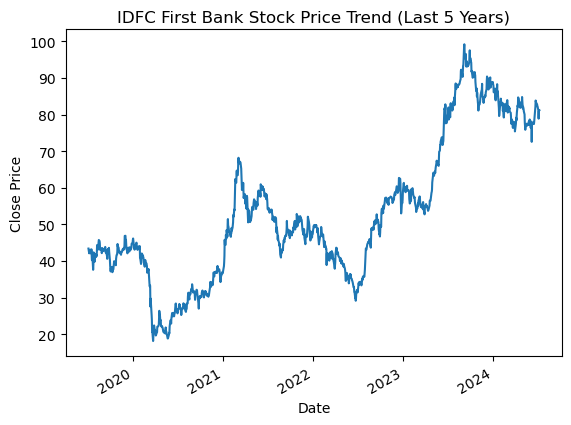

In [5]:
import matplotlib.pyplot as plt

# Plot the stock price trend
stock_data['Close'].plot(title='IDFC First Bank Stock Price Trend (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## Technical Analysis

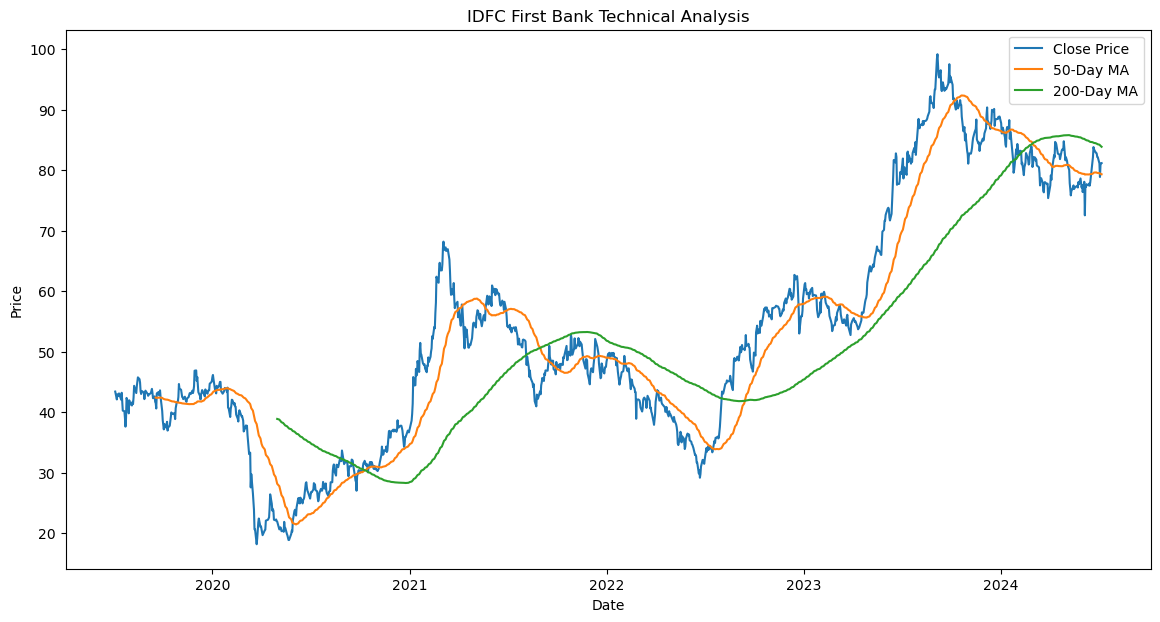

In [7]:
# Calculate Moving Averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(14,7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA50'], label='50-Day MA')
plt.plot(stock_data['MA200'], label='200-Day MA')
plt.title('IDFC First Bank Technical Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:
financials

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Tax Effect Of Unusual Items,0.0,0.0,-12801654.829176,10871110.432868,NaN
Tax Rate For Calcs,0.237172,0.254088,0.243818,0.06898,NaN
Total Unusual Items,0.0,0.0,-52505000.0,157597000.0,NaN
Total Unusual Items Excluding Goodwill,0.0,0.0,-52505000.0,157597000.0,NaN
Net Income From Continuing Operation Net Minority Interest,29423500000.0,24849300000.0,1323070000.0,4831792000.0,NaN
Reconciled Depreciation,6307600000.0,4349900000.0,3732630000.0,3425065000.0,NaN
Net Interest Income,164548100000.0,126371700000.0,97076208000.0,73830250000.0,NaN
Interest Expense,138703000000.0,100906400000.0,74650703000.0,85851273000.0,NaN
Interest Income,303251100000.0,227278100000.0,171726911000.0,159681523000.0,NaN
Normalized Income,29423500000.0,24849300000.0,1362773345.170824,4685066110.432868,NaN


In [20]:
balance_sheet

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Treasury Shares Number,0.0,NaN,NaN,NaN,NaN
Ordinary Shares Number,7069923853.0,6618121816.0,6217708310.0,5675849855.0,NaN
Share Issued,7069923853.0,6618121816.0,6217708310.0,5675849855.0,NaN
Net Debt,384545800000.0,434334120000.0,372602266000.0,374974309000.0,NaN
Total Debt,509357400000.0,572120920000.0,529625993000.0,457860854000.0,NaN
Tangible Book Value,321339200000.0,257078812000.0,209424499000.0,178997149000.0,NaN
Invested Capital,832093200000.0,830596429000.0,740447189000.0,636858003000.0,NaN
Net Tangible Assets,321339200000.0,257078812000.0,209424499000.0,178997149000.0,NaN
Common Stock Equity,322735800000.0,258475509000.0,210821196000.0,178997149000.0,NaN
Total Capitalization,832093200000.0,830596429000.0,740447189000.0,636858003000.0,NaN


In [22]:
cashflow

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,101692800000.0,23749100000.0,21278678000.0,134557403000.0,NaN
Repayment Of Debt,-77763500000.0,NaN,NaN,-116111000000.0,-125862047000.0
Issuance Of Debt,15000000000.0,42494900000.0,56765100000.0,0.0,NaN
Issuance Of Capital Stock,33226400000.0,22595500000.0,30340750000.0,20129152000.0,NaN
Capital Expenditure,-13736100000.0,-11881000000.0,-4760568000.0,-5859728000.0,NaN
End Cash Position,124811500000.0,137786800000.0,157579090000.0,57731245000.0,NaN
Other Cash Adjustment Outside Changein Cash,-100000.0,NaN,-100000.0,NaN,NaN
Beginning Cash Position,137786800000.0,157023700000.0,58278553000.0,41628440000.0,NaN
Changes In Cash,-12975200000.0,-19236900000.0,99300537000.0,16102805000.0,NaN
Financing Cash Flow,-29537100000.0,65090400000.0,102105889000.0,-95981848000.0,NaN


## __PROS & CONS__

### PROS

- Company is expected to give good quarter
- Company has delivered good profit growth of 28.6% CAGR over last 5 years